In [1]:
import pandas as pd
import os
from datetime import date
from PIL import Image

In [2]:
# OS dependent path
bog_path = os.path.join("dataset", "bog_clean.csv")
mex_path = os.path.join("dataset", "mex_clean.csv")
equ_path = os.path.join("dataset", "uio_clean.csv")

In [3]:
# read dataset
bog_df = pd.read_csv(bog_path)
mex_df = pd.read_csv(mex_path)
equ_df = pd.read_csv(equ_path)

In [4]:
bog_df.tail(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
3060,3061,Bogotá,2016-10-27 12:28:22,2016-10-27 01:16:58,-74.061556,4.709213,-74.042396,4.708566,N,2917,10994,1401
3061,3062,Bogotá,2016-10-27 07:40:49,2016-10-27 09:08:09,-74.050934,4.752078,-74.050875,4.752123,N,5240,15803,3076
3062,3063,Bogotá,2016-10-26 04:27:39,2016-10-28 06:50:28,-74.052223,4.705252,-74.050725,4.714622,N,138169,5934,354


In [5]:
mex_df.tail(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
12691,12692,México DF Taxi Libre,2016-10-27 11:19:44,2016-10-27 11:38:35,-99.170637,19.283637,-99.178194,19.280982,N,1131,6051,228
12692,12693,México DF Taxi de Sitio,2016-10-28 06:49:41,2016-10-28 06:51:25,-99.194384,19.396768,-99.194622,19.396717,N,104,49,96
12693,12694,México DF Radio Taxi,2016-10-27 10:26:38,2016-10-28 07:10:21,-99.180135,19.369919,-99.180551,19.372276,N,31424,3448,217


In [6]:
equ_df.tail(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
32363,32364,Quito,2016-10-27 12:10:18,2016-10-27 06:33:53,-78.477247,-0.107514,-78.490093,-0.100859,N,66216,23607,958
32364,32365,Quito,2016-10-25 04:58:55,2016-10-25 05:00:25,-78.550264,-0.256730,-78.550306,-0.256756,N,91,43,70
32365,32366,Quito,2016-10-28 06:47:59,2016-10-28 06:58:31,-78.431986,-0.341538,-78.446296,-0.327428,N,633,3296,150


In [7]:
print(bog_df.shape)
print(mex_df.shape)
print(equ_df.shape)

(3063, 12)
(12694, 12)
(32366, 12)


In [8]:
# check missing data each files
bog_df.isna().sum(axis=0)

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dist_meters           0
wait_sec              0
dtype: int64

In [9]:
mex_df.isna().sum(axis=0)

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dist_meters           0
wait_sec              0
dtype: int64

In [10]:
equ_df.isna().sum(axis=0)

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dist_meters           0
wait_sec              0
dtype: int64

In [11]:
# add a feature that contain the country name to distinguish 'em later
bog_df["country"] = "colombia"
mex_df["country"] = "mexico"
equ_df["country"] = "equador"

Bogota map plot : 


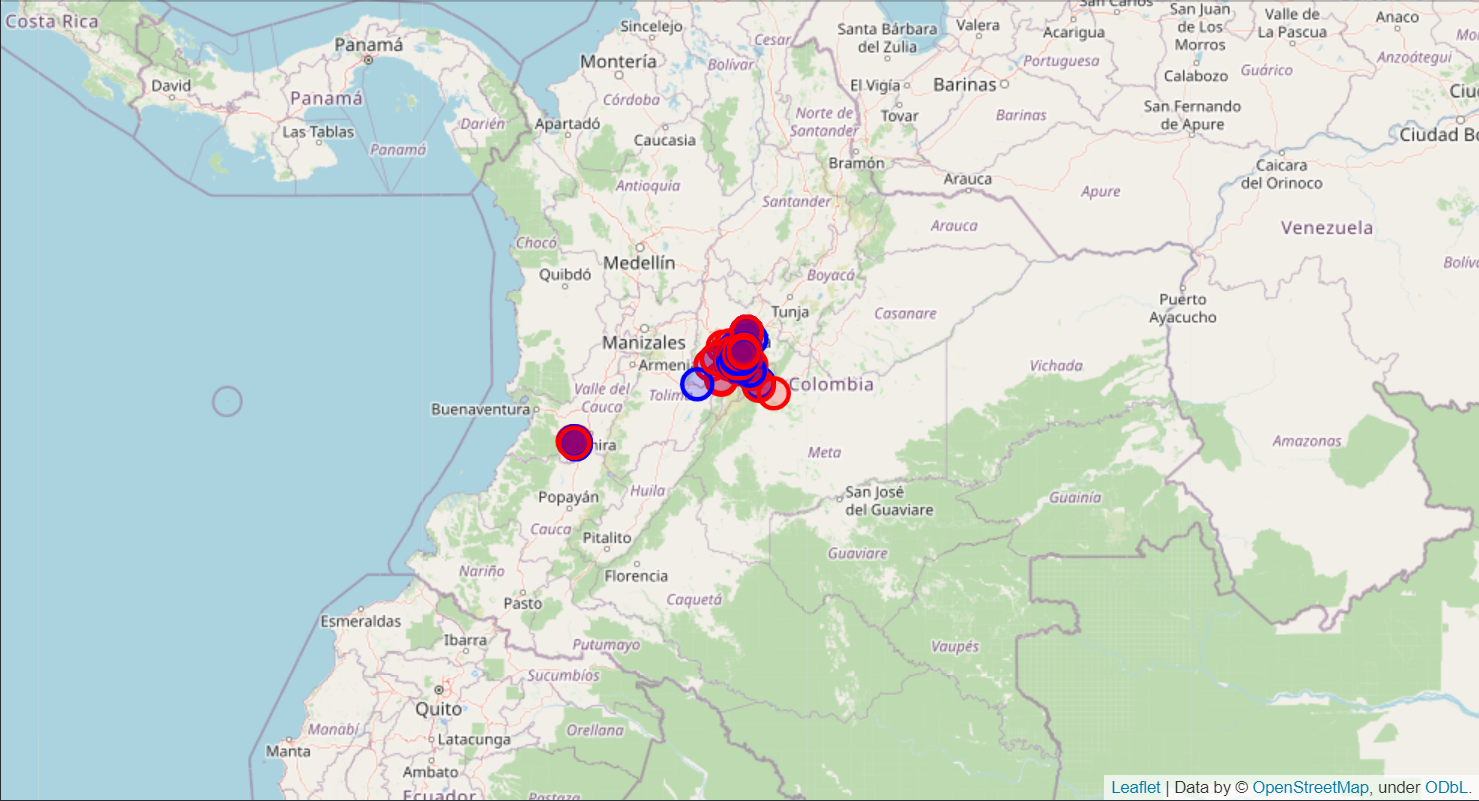

In [12]:
# check longitude and latitude with marker for each country
# check map_checker.ipynb how to generate the picture
img = Image.open(os.path.join("dataset", "bog_plot.png"))
print("Bogota map plot : ")
img

Mexico map plot : 


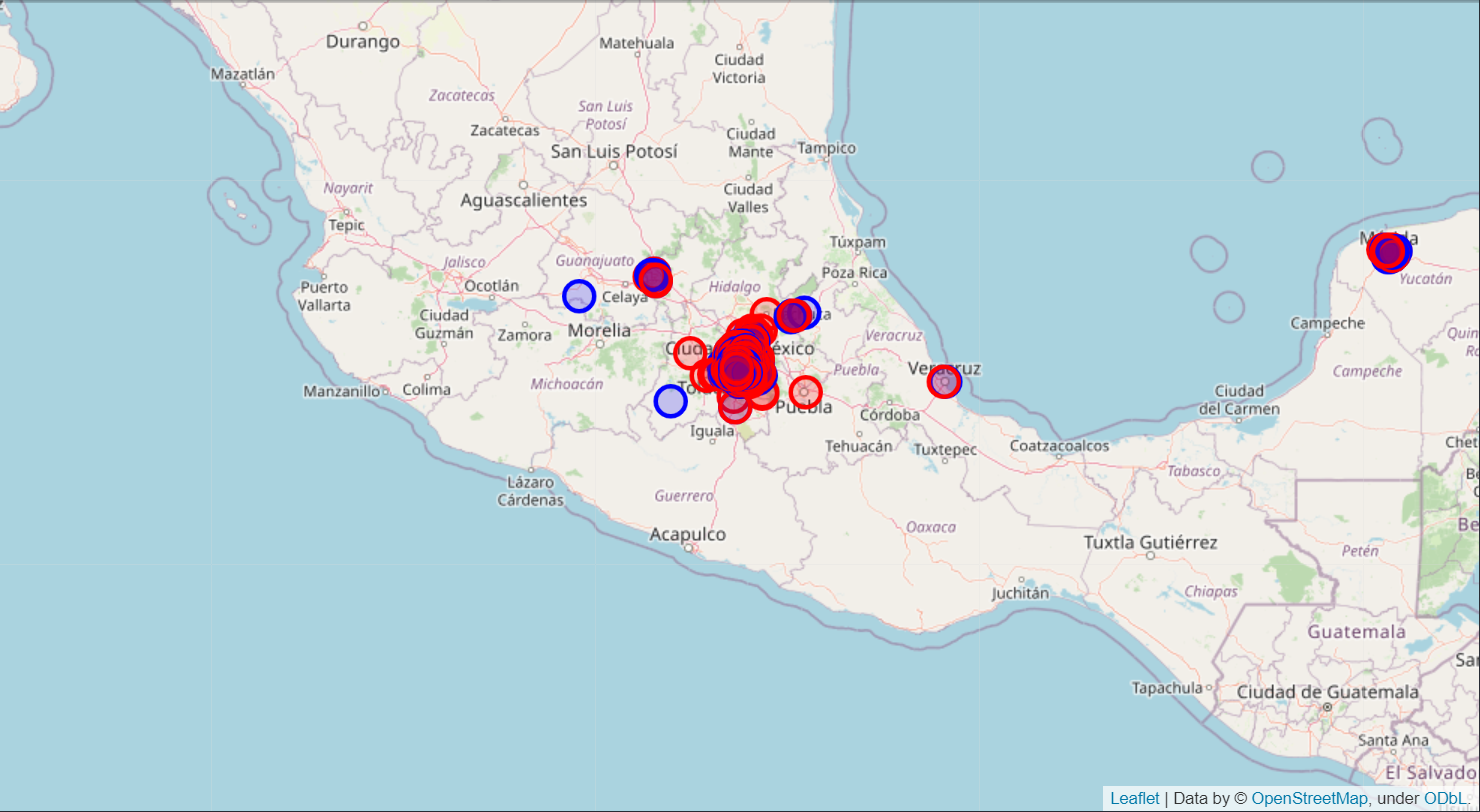

In [13]:
img = Image.open(os.path.join("dataset", "mex_plot.png"))
print("Mexico map plot : ")
img

Equador map plot : 


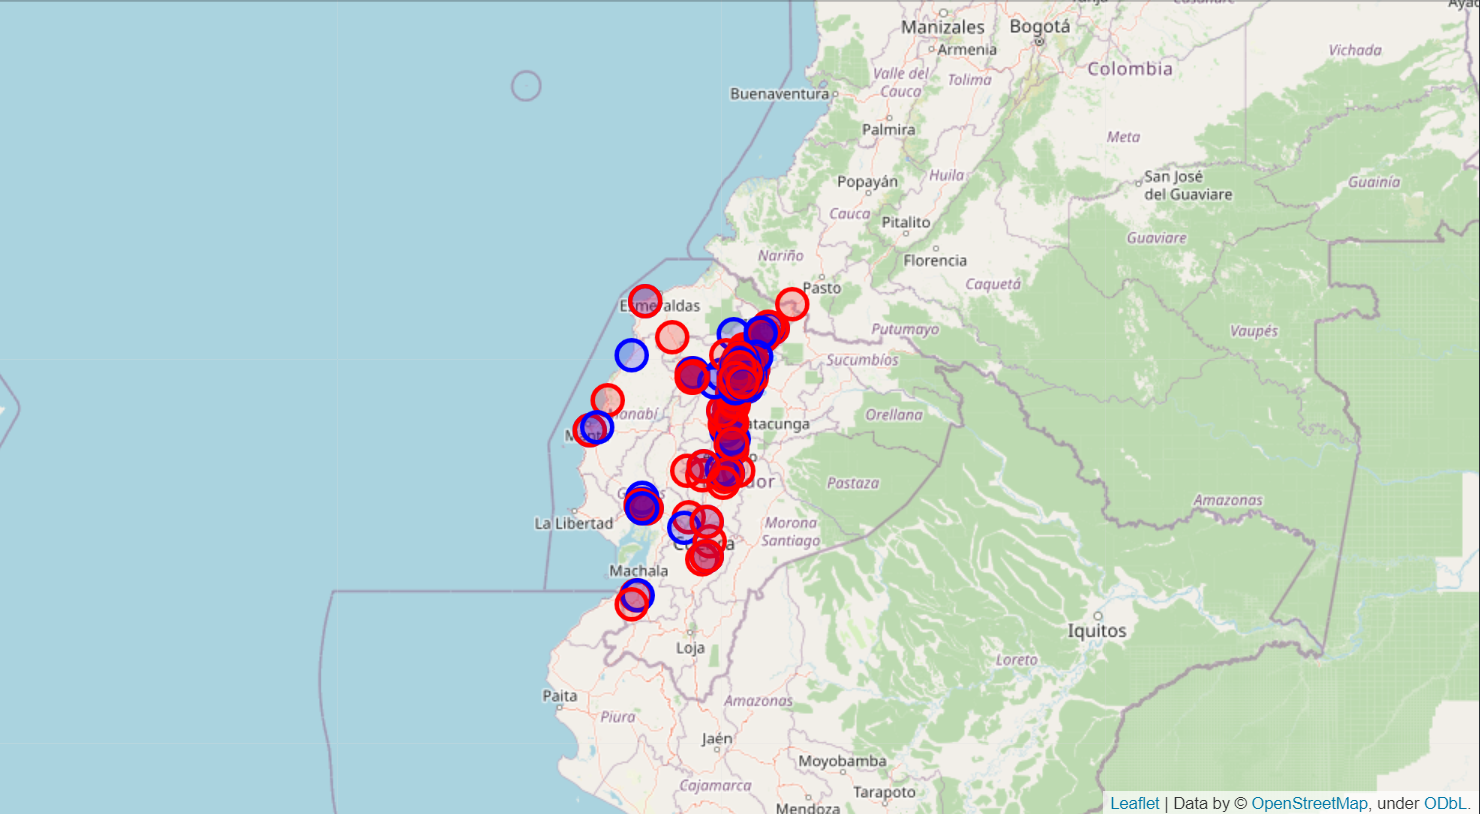

In [14]:
img = Image.open(os.path.join("dataset", "equ_plot.png"))
print("Equador map plot : ")
img

In [15]:
# looks good no missing data
# lets just concat the datasets from bogota, mexico, and equador
dataset_df = pd.concat([bog_df, mex_df, equ_df], ignore_index=True)
print(dataset_df.shape)

(48123, 13)


In [16]:
# check type data each column
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48123 entries, 0 to 48122
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  48123 non-null  int64  
 1   vendor_id           48123 non-null  object 
 2   pickup_datetime     48123 non-null  object 
 3   dropoff_datetime    48123 non-null  object 
 4   pickup_longitude    48123 non-null  float64
 5   pickup_latitude     48123 non-null  float64
 6   dropoff_longitude   48123 non-null  float64
 7   dropoff_latitude    48123 non-null  float64
 8   store_and_fwd_flag  48123 non-null  object 
 9   trip_duration       48123 non-null  int64  
 10  dist_meters         48123 non-null  int64  
 11  wait_sec            48123 non-null  int64  
 12  country             48123 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 4.8+ MB


In [17]:
# check categorical features data
for i in dataset_df[["vendor_id", "store_and_fwd_flag", "country"]] :
    print(f"{i} : {dataset_df[i].unique()} \n")

vendor_id : ['Bogotá' 'Bogotá UberX' 'Bogota UberBlack' 'Bogotá UberVan'
 'Bogotá UberAngel' 'México DF Taxi de Sitio' 'México DF Taxi Libre'
 'México DF Radio Taxi' 'México DF UberX' 'México DF UberXL'
 'México DF UberSUV' 'México DF UberBlack' 'Quito' 'Quito Cabify Lite'
 'Quito Cabify Executive' 'Quito UberX'] 

store_and_fwd_flag : ['N'] 

country : ['colombia' 'mexico' 'equador'] 



In [18]:
# so store_and_fwd_flag only have one unique value, just drop it coz not very useful
# also drop id
dataset_df = dataset_df.drop(["store_and_fwd_flag", "id"], axis=1)

In [19]:
# check and drop if there is any duplicated data
dataset_df = dataset_df.drop_duplicates()
print(dataset_df.shape)

(47388, 11)


In [20]:
# change date and time format
dataset_df["pickup_datetime"] = pd.to_datetime(dataset_df["pickup_datetime"], format="%Y/%m/%d %H:%M:%S")
dataset_df["dropoff_datetime"] = pd.to_datetime(dataset_df["dropoff_datetime"], format="%Y/%m/%d %H:%M:%S")

In [21]:
# check max and minimum time
print(dataset_df["pickup_datetime"].dt.time.max())
print(dataset_df["dropoff_datetime"].dt.time.max())

print(dataset_df["pickup_datetime"].dt.time.min())
print(dataset_df["dropoff_datetime"].dt.time.min())

12:59:59
12:59:59
01:00:01
01:00:01


In [22]:
# there is no AM PM notation but the time is maxed at 12:59:59 and there is no 00:00:00 time range
# drop the time, because not useful and might lead to mis-calculation
dataset_df["pickup_datetime"] = pd.to_datetime(dataset_df["pickup_datetime"]).dt.date
dataset_df["dropoff_datetime"] = pd.to_datetime(dataset_df["dropoff_datetime"]).dt.date

In [23]:
# sort by pickup date time and show 5 data
dataset_df = dataset_df.sort_values(by=["pickup_datetime"])
dataset_df = dataset_df.reset_index(drop=True)
dataset_df.head(5)

,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,country
0,Quito,2014-12-31,2017-03-21,-78.497111,-0.268710,-78.497123,-0.268737,70026052,1359,52168,equador
1,Quito,2016-05-13,2016-07-22,-78.475110,-0.160849,-78.485771,-0.206527,6078382,8584,15308,equador
2,Quito,2016-05-27,2016-09-21,-78.508943,-0.145293,-78.483182,-0.191437,10106967,5883,545,equador
3,Quito,2016-05-31,2016-07-02,-78.477271,-0.192212,-78.477870,-0.190849,2812916,179,2,equador
4,Quito,2016-06-03,2016-07-04,-78.476981,-0.156846,-78.462994,-0.093474,2680441,7327,122,equador
